In [56]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math
import numpy as np
from IPython.display import Markdown as md

N = 15 # Вариант

def variant_function(x: float) -> float: 
    return math.sin((N-5)/(N-10)*x) + math.cos((N-5)/(N-10)*x)

xs = np.linspace(-2, 2, 6)
ys = [variant_function(xi) for xi in xs]
print('Значения исходной функции')
print("x\t\t\ty")
for i in range(len(xs)):
    tabs = len(str(xs[i])) // 8
    print(xs[i], end='')
    for i in range(3 - tabs):
        print('\t', end='')
    print(ys[i])


xs_plot = np.linspace(-2, 2, 100)
ys_plot = [variant_function(x) for x in xs_plot]



Значения исходной функции
x			y
-2.0			-0.02064938155235707
-1.2			-0.02064938155235707
-0.3999999999999999	0.10315887444431626
0.40000000000000036	0.10315887444431626
1.2000000000000002	0.10315887444431626
2.0			-0.02064938155235707


Значения исходной функции

|     x     |        y         |
|----------:|-----------------:|
|      -2.0 | 0.10315887444431626 |
|      -1.2 | -1.4128568960923964 |
| 0.3999999999999999	 | -0.02064938155235707 |
|  0.40000000000000036	      | 1.4140628002466882 |
|   1.2     | -0.061930534990095154 |
|    2.0    | -1.4104461161715403 |

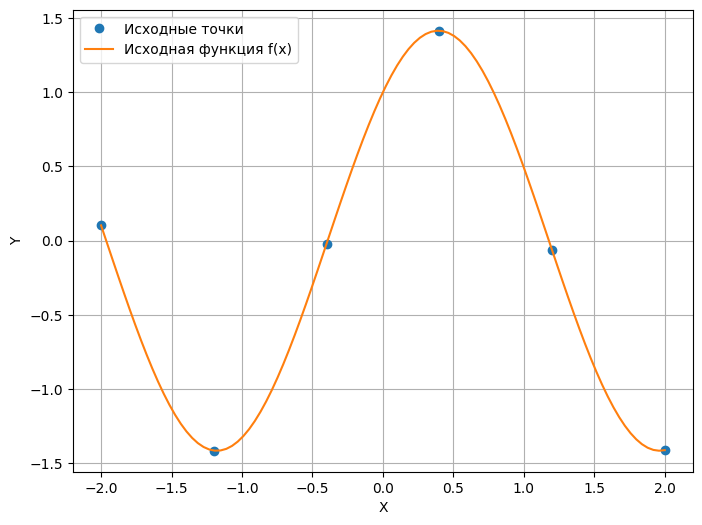

In [57]:

plt.figure(figsize=(8, 6))
plt.plot(xs, ys, 'o', label='Исходные точки')
plt.plot(xs_plot, ys_plot, label='Исходная функция f(x)')
# plt.title('График исходной функции')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()



In [58]:

def cubic_spline_interpolation_my(xs: list[float], ys: list[float]):
    n = len(xs)
    
    # Вычисляем коэффициенты для кубических сплайнов
    h = [xs[i+1] - xs[i] for i in range(n-1)]
    a = [(3/h[i]) * (ys[i+1]-ys[i]) - (3/h[i-1]) * (ys[i]-ys[i-1]) for i in range(1, n-1)]
    
    l = [1] * n
    mu = [0] * n
    z = [0] * n
    
    # Прямой проход метода прогонки
    for i in range(1, n-1):
        l[i] = 2 * (xs[i+1] - xs[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (a[i-1] - h[i-1] * z[i-1]) / l[i]
    
    # Обратный проход метода прогонки
    c = [0] * n
    b = [0] * n
    d = [0] * n
    for i in range(n-2, -1, -1):
        c[i] = z[i] - mu[i] * c[i+1]
        b[i] = (ys[i+1] - ys[i]) / h[i] - 1 / 3 * h[i] * (c[i+1] + 2 * c[i])
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
    
    # Находим минимальное и максимальное значение x
    min_x = min(xs)
    max_x = max(xs)
    print(f'a {a}' )
    print(f'b {b}')
    print(f'c {c}')
    print(f'd {d}')

    
    
    # Вычисляем значения для интерполяции в пределах min_x и max_x с шагом 0.1
    x_interp = [min_x + i * 0.1 for i in range(int((max_x - min_x) / 0.1) + 1)]
    
    # Интерполяция для новых значений 
    y_interp = []
        
    def interpolated_function(x_val):
        for j in range(n-1):
            if xs[j] <= x_val <= xs[j+1]:
                return ys[j] + b[j] * (x_val - xs[j]) + c[j] * (x_val - xs[j]) ** 2 + d[j] * (x_val - xs[j]) ** 3
    
    return interpolated_function

    # for i in range(len(x_interp)):
    #     for j in range(n-1):
    #         if x[j] <= x_interp[i] <= x[j+1]:
    #             y_interp.append(y[j] + b[j] * (x_interp[i] - x[j]) + c[j] * (x_interp[i] - x[j]) ** 2 + d[j] * (x_interp[i] - x[j]) ** 3)
    #             break
                

cs_my = cubic_spline_interpolation_my(xs, ys)
x_interp_my = np.linspace(xs[0], xs[-1], 100)
y_interp_my = [cs_my(x) for x in x_interp_my]


a [10.90583731903782, 0.15939250222127033, -10.915145688884357, 0.47804157770751843]
b [-2.7948560417188233, -0.09534705607502492, 2.711963306031399, -0.15155730677900614, -2.260538404306898, 0]
c [0.0, 3.374386232054748, 0.13475172057828189, -3.7141524865912867, 1.0779261146814214, 0]
d [1.4059942633561449, -1.349847713115194, -1.603710086320653, 1.996699417196962, -0.449135881117259, 0]


![](./блок-схема.png)

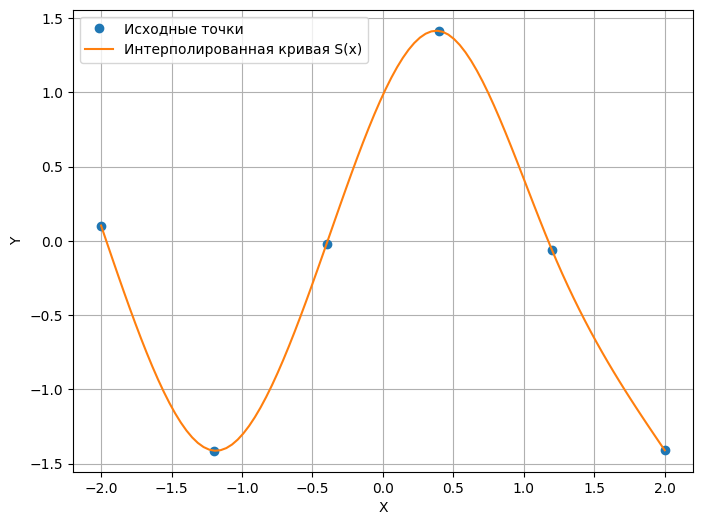

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(xs, ys, 'o', label='Исходные точки')
plt.plot(x_interp_my, y_interp_my, label='Интерполированная кривая S(x)')
# plt.title('Полученный кубический сплайн')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()



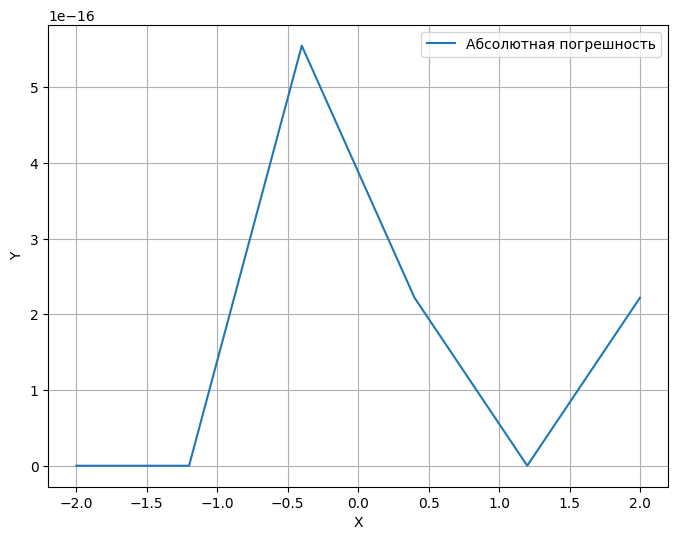

[0.10315887444431626, -1.4128568960923964, -0.02064938155235707, 1.4140628002466882, -0.061930534990095154, -1.4104461161715403]
[0.10315887444431626, -1.4128568960923964, -0.020649381552356516, 1.414062800246688, -0.061930534990095154, -1.4104461161715405]
[0.0, 0.0, 5.551115123125783e-16, 2.220446049250313e-16, 0.0, 2.220446049250313e-16]
6.77927340424307e-32


In [60]:
xs_accurate = xs
ys_accurate = ys
ys_my = [cs_my(x) for x in xs_accurate]

abs_errs = [abs(ys_accurate[i] - ys_my[i]) for i in range(len(ys_my))]
rel_errs = [abs(abs_errs[i] / ys_accurate[i]) * 100 for i in range(len(ys_accurate))]
plt.figure(figsize=(8, 6))
plt.plot(xs, abs_errs, label='Абсолютная погрешность')
# plt.plot(xs, rel_errs, label='Относительная погрешность')

# plt.title('График исходной функции')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

square_diffs = [diff ** 2 for diff in abs_errs]

std_err = sum(square_diffs) / len(square_diffs) # среднеквадратическое отклонение

print(ys_accurate)
print(ys_my)
print(abs_errs)

print(std_err)


Среднеквадратическое отклонение  
  
$\sigma = 6.77927340424307e \cdot e^{-32}$